# Laboratorio 2

## Desarrollo de una herramienta anal√≠tica usando paquetes especializados para an√°lisis de datos en Python

Para el desarrollo de esta actividad puedes utilizar cualquier librer√≠a externa. Te recomendamos leer por completo el enunciado del laboratorio antes de comenzar, de forma que tengas claro el prop√≥sito global de la actividad y puedas desarrollar tu soluci√≥n apuntando a √©l desde el inicio.

Al desarrollar este laboratorio pondr√°s a prueba tus habilidades para:

1. Identificar y abordar preguntas de negocio y de *analytics*.
2. Leer datos desde archivos y almacenarlos utilizando m√©todos de librer√≠as especializadas.
3. Explorar, modificar, limpiar y unir objetos tablas de datos.
4. Implementar an√°lisis combinando m√©tricas descriptivas, visualizaci√≥n, filtrado y agrupaci√≥n.
5. Implementar an√°lisis basado en modelos estad√≠sticos o de *machine learning*.

##  Contexto: desigualdad y factores de √©xito en pruebas Saber 11 en Colombia

El ICFES es el Instituto Colombiano para el Fomento de la Educaci√≥n Superior y est√° adscrito al Ministerio de Educaci√≥n a nivel nacional. Como parte de sus funciones, el ICFES administra las pruebas Saber 11, las cuales eval√∫an a todos los estudiantes del pa√≠s al final de su educaci√≥n secundaria. El examen contiene preguntas que eval√∫an una variedad de √°reas del conocimiento (ej., matem√°ticas, f√≠sica, ingl√©s, etc.) y se lleva a cabo dos veces al a√±o, ajust√°ndose a los diferentes calendarios acad√©micos que siguen las instituciones educativas. Al momento de inscribirse a las pruebas, los estudiantes diligencian un formulario que recoge informaci√≥n sociodemogr√°fica y relacionada con la instituci√≥n a la que pertenecen. El fin es obtener informaci√≥n con respecto al desempe√±o de los estudiantes en la prueba y de sus caracter√≠sticas.

Al igual que otros pa√≠ses de la regi√≥n, Colombia tiene grandes retos en t√©rminos de desigualdad, particularmente en el contexto de educaci√≥n primaria y secundaria. Por esta raz√≥n, para el Estado colombiano es muy valioso el amplio registro de datos que el ICFES genera alrededor de las pruebas Saber 11, pues con ellos se pueden generar an√°lisis sobre la calidad de la educaci√≥n en el pa√≠s y eventualmente dar lugar a recomendaciones sobre pol√≠ticas p√∫blicas. En particular, la problem√°tica a abordar en este caso de estudio es la desigualdad y factores de √©xito en las pruebas Saber 11. 

Los objetivos de este caso de estudio son:

* Entender el contenido de los archivos de datos proporcionados sobre las pruebas Saber 11, generar un reporte acerca de sus caracter√≠sticas principales y seleccionar las partes de dicho contenido que podr√≠an ser relevantes para el an√°lisis.


* Identificar caracter√≠sticas de las variables de inter√©s y relaciones entre ellas, por ejemplo, a trav√©s de agrupaci√≥n, visualizaciones y estad√≠sticas descriptivas.


* Proponer un modelo que busque relacionar las variables de inter√©s con el desempe√±o de los estudiantes y concluir acerca de los posibles hallazgos que se podr√≠an reportar para el *stakeholder*.


* Generar una herramienta que permita a un usuario interactuar con alguno de los par√°metros del an√°lisis realizado de forma relevante en el contexto del problema.

## Fase 1: obtener e inspeccionar archivos

En esta fase te har√°s una idea general del contenido de los datos y generar√°s un reporte al respecto (ej., imprimiendo mensajes, presentando tablas de resumen, etc.). Adem√°s, seleccionar√°s un segmento de los datos que consideres √∫til para realizar tu an√°lisis.

Pautas generales:

* Utilizar una librer√≠a especializada para leer los archivos de datos y agregarlos seg√∫n sea necesario (ej., utilizando los m√©todos `append` o `concat` si eliges cargarlos utilizando la librer√≠a `pandas`).
* Inspeccionar el archivo a partir de sus encabezados, columnas y descripciones de las variables seg√∫n su tipo (ej., num√©ricas, categ√≥ricas).
* Declarar una estructura de datos (ej., una lista) para almacenar un subconjunto de variables que puedan ser relevantes para la problem√°tica de inter√©s.

Preguntas gu√≠a:

* ¬øQu√© dimensiones tienen los datos?
* ¬øCon cu√°ntos a√±os y periodos de evaluaci√≥n se cuenta?
* ¬øCu√°les variables pueden ser de inter√©s para la problem√°tica planteada?
* ¬øQu√© porcentaje de datos faltantes o no v√°lidos hay en las columnas de inter√©s? ¬øQu√© planteas para manejarlos?

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

calendario_a = pd.read_csv('./archivos/Examen_Saber_11_20221.csv', sep=';', low_memory=False)
calendario_b = pd.read_csv('./archivos/Examen_Saber_11_20222.csv', sep=';', low_memory=False)

columnas_comunes = calendario_a.columns.intersection(calendario_b.columns)
df = pd.concat([
    calendario_a[columnas_comunes],
    calendario_b[columnas_comunes]
], ignore_index=True)

In [12]:
print(f'Dimensi√≥n de ambos conjuntos: {df.shape}')
print(f'''\nDimensi√≥n de los datos del calendario A: {calendario_a.shape}
      Filas calendario A: {calendario_a.shape[0]}
      Columnas calendario A: {calendario_a.shape[1]}''')
print(f'''\nDimensi√≥n de los datos del calendario B: {calendario_b.shape}
      Filas calendario B: {calendario_b.shape[0]}
      Columnas calendario B: {calendario_b.shape[1]}''')

print(f"\nA√±os y periodos en el conjunto de datos: 2022-1 y 2022-2")

columnas = ['desemp_sociales_ciudadanas','estu_repite','fami_tieneinternet','cole_bilingue',
            'fami_estratovivienda', 'cole_area_ubicacion', 'estu_nse_establecimiento',
            'desemp_c_naturales', 'desemp_lectura_critica', 'desemp_matematicas',
            'desemp_ingles', 'estu_nse_individual', 'estu_inse_individual',
            'fami_numlibros', 'punt_global']
columnas_target = columnas
print(f"\nVariables de inter√©s para la problem√°tica:\n {columnas_target}")

faltantes = df[columnas_target].isna().sum() / df.shape[0] * 100
print("\nPorcentaje de datos faltantes por columna de inter√©s:")
print(", ".join([f"{columna}: {porcentaje:.2f}%" for columna, porcentaje in faltantes.items()]))

df_filtrado = df[columnas_target].copy()
for col in df_filtrado.columns:
    if df_filtrado[col].dtype == 'object':
        df_filtrado[col] = df_filtrado[col].fillna('Sin dato')
    else:
        df_filtrado[col] = pd.to_numeric(df_filtrado[col], errors='coerce')
        df_filtrado[col] = df_filtrado[col].fillna(df_filtrado[col].median())

print(f"\nDimensiones despu√©s de imputar faltantes:")
print(f"‚Üí Columnas conservadas: {df_filtrado.shape[1]}")
print(f"‚Üí Filas disponibles: {df_filtrado.shape[0]}")

Dimensi√≥n de ambos conjuntos: (662978, 84)

Dimensi√≥n de los datos del calendario A: (73795, 84)
      Filas calendario A: 73795
      Columnas calendario A: 84

Dimensi√≥n de los datos del calendario B: (589183, 84)
      Filas calendario B: 589183
      Columnas calendario B: 84

A√±os y periodos en el conjunto de datos: 2022-1 y 2022-2

Variables de inter√©s para la problem√°tica:
 ['desemp_sociales_ciudadanas', 'estu_repite', 'fami_tieneinternet', 'cole_bilingue', 'fami_estratovivienda', 'cole_area_ubicacion', 'estu_nse_establecimiento', 'desemp_c_naturales', 'desemp_lectura_critica', 'desemp_matematicas', 'desemp_ingles', 'estu_nse_individual', 'estu_inse_individual', 'fami_numlibros', 'punt_global']

Porcentaje de datos faltantes por columna de inter√©s:
desemp_sociales_ciudadanas: 0.00%, estu_repite: 0.00%, fami_tieneinternet: 19.89%, cole_bilingue: 30.48%, fami_estratovivienda: 20.56%, cole_area_ubicacion: 14.97%, estu_nse_establecimiento: 14.98%, desemp_c_naturales: 0.00%, d

## Fase 2: identificar caracter√≠sticas y relaciones en las variables

En esta fase realizar√°s an√°lisis descriptivo para identificar posibles patrones o relaciones entre las variables de inter√©s para la problem√°tica planteada. Adem√°s, expondr√°s estad√≠sticas descriptivas y visualizaciones para concluir al respecto de los patrones y las relaciones identificadas. Finalmente, elegir√°s el segmento de los datos sobre el cual profundizar√°s con tu an√°lisis (este puede ser, o no, igual al seleccionado anteriormente).

Pautas generales:

* Calcular estad√≠sticas descriptivas b√°sicas (por lo menos, media/mediana y varianza/desviaci√≥n) para cada variable sociodemogr√°fica relevante en el contexto del problema.
* Utilizar librer√≠as especializadas (ej., `matplotlib`, `seaborn`, etc.) para inspeccionar visualmente variables de inter√©s. Los m√©todos `distplot`, `pairplot`, `boxplot`, o `violinplot`, entre otros, pueden ser √∫tiles.
* Utilizar el m√©todo `groupby` de `pandas`, en conjunto con m√©todos de visualizaci√≥n, puede proveer evidencia del impacto de las variables sociodemogr√°ficas de inter√©s sobre el desempe√±o de los estudiantes en la prueba.

Preguntas gu√≠a:

* ¬øHay patrones de inter√©s en las distribuciones de las variables o en las relaciones entre ellas?
* ¬øConsideras que existe alg√∫n impacto significativo de variables sociodemogr√°ficas en los puntajes globales o por √°rea?
* ¬øSobre cu√°les variables har√≠as un an√°lisis m√°s profundo?

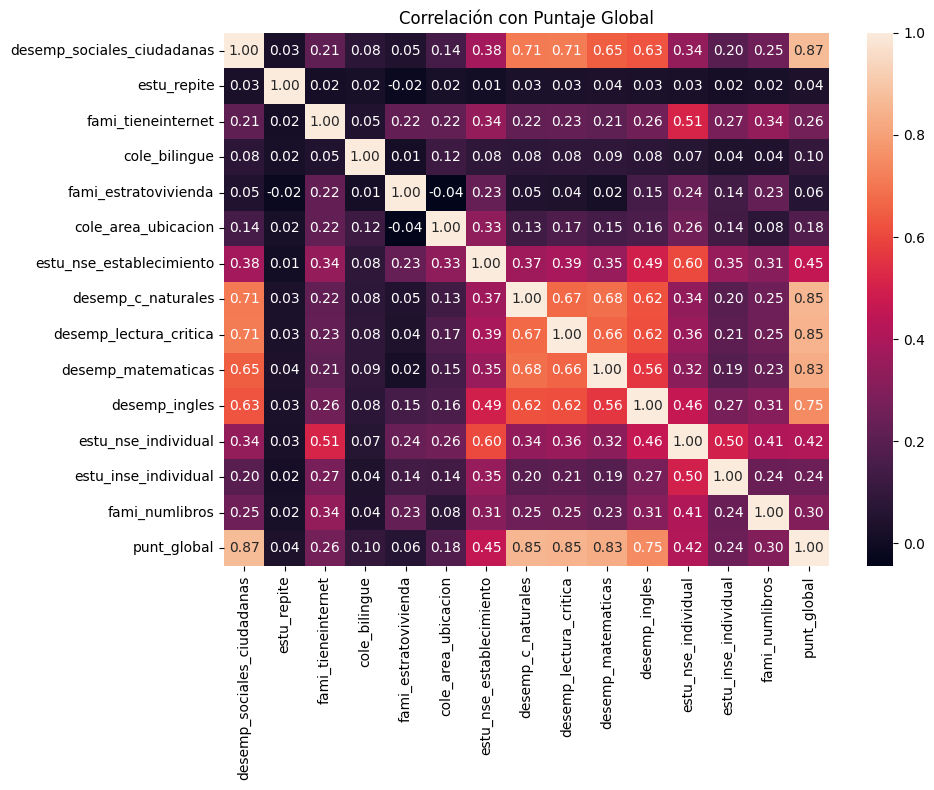

In [13]:
df_corr = df[columnas].copy()

for col in df_corr.columns:
    if df_corr[col].dtype == 'object' or str(df_corr[col].dtype).startswith('category'):
        df_corr[col] = df_corr[col].astype('category').cat.codes

df_corr.dropna(inplace=True)

correlaciones = df_corr.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlaciones, annot=True, fmt=".2f")
plt.title('Correlaci√≥n con Puntaje Global')
plt.tight_layout()
plt.show()

In [14]:
df_corr = df[columnas].copy()

for col in df_corr.columns:
    if df_corr[col].dtype == 'object' or str(df_corr[col].dtype).startswith('category'):
        df_corr[col] = df_corr[col].astype('category').cat.codes

df_corr.dropna(inplace=True)

correlaciones = df_corr.corr()

if 'punt_global' in correlaciones.columns:
    plt.figure(figsize=(10, 6))
    sns.heatmap(correlaciones[['punt_global']].sort_values(by='punt_global', ascending=False),
                annot=True, cmap='Spectral', fmt=".2f", linewidths=0.5)
    plt.title('Correlaci√≥n solo con Puntaje Global (variables seleccionadas)', fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()


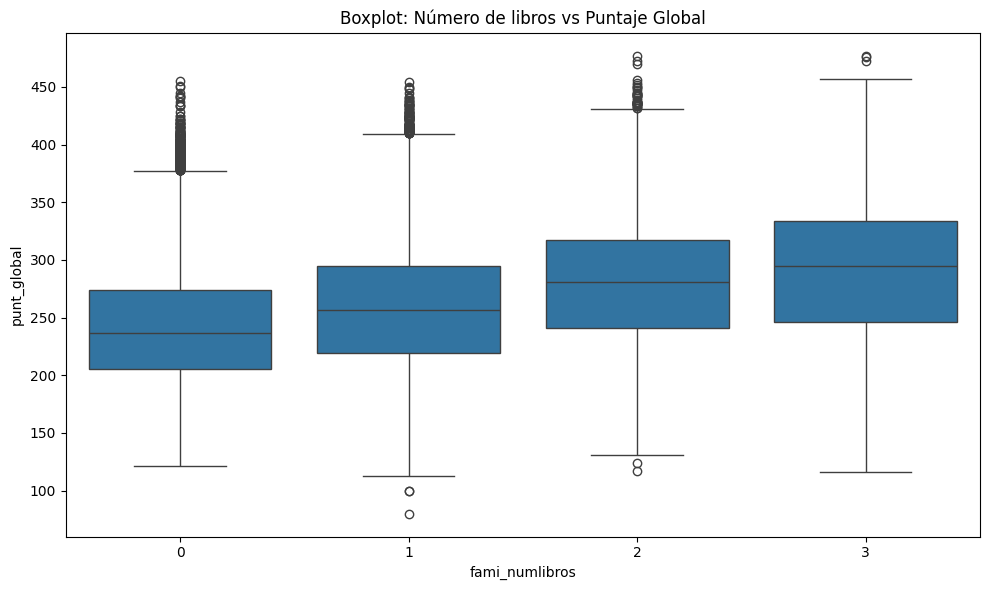

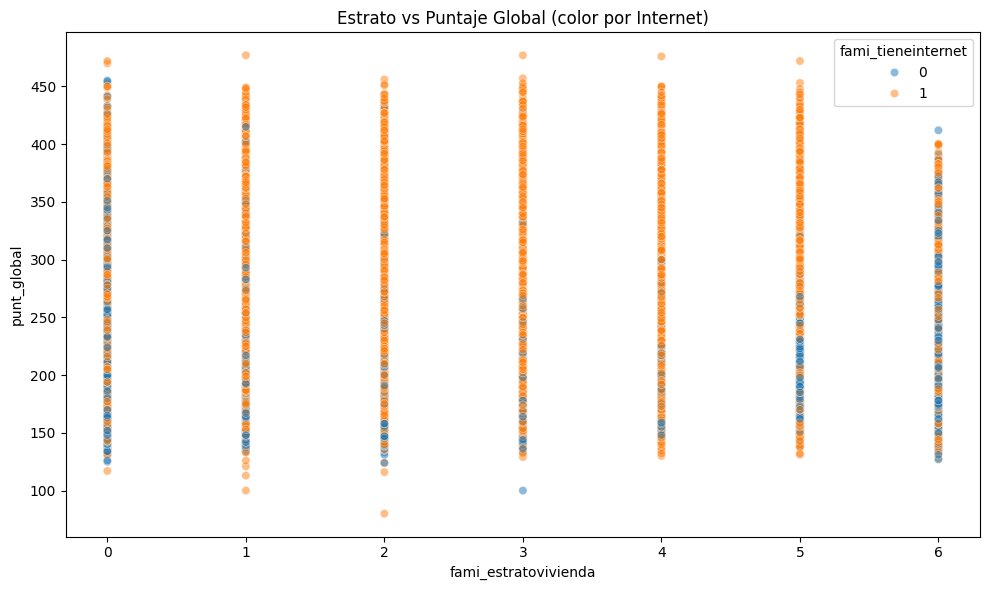

In [15]:
df_vis = df[columnas].copy()
df_vis.dropna(inplace=True)

def agrupar_estrato(e):
    if e in [1, 2]: return 'Bajo'
    elif e in [3, 4]: return 'Medio'
    elif e in [5, 6]: return 'Alto'
    else: return 'Otro'
df_vis['estrato_grupo'] = df_vis['fami_estratovivienda'].apply(agrupar_estrato)

df_vis['inse_tertil'] = pd.qcut(df_vis['estu_inse_individual'], q=3, labels=['Bajo', 'Medio', 'Alto'])

df_vis['internet_area'] = df_vis['fami_tieneinternet'].astype(str) + "_" + df_vis['cole_area_ubicacion'].astype(str)
df_vis['bilingue_estrato'] = df_vis['cole_bilingue'].astype(str) + "_" + df_vis['estrato_grupo']
df_vis['repite_nse'] = df_vis['estu_repite'].astype(str) + "_" + df_vis['estu_nse_individual'].astype(str)

def perfil_socioeco(row):
    estrato = row['fami_estratovivienda']
    internet = row['fami_tieneinternet']
    if estrato in [1, 2] and internet == 0:
        return 'Bajo'
    elif (estrato in [1, 2] and internet == 1) or (estrato in [3, 4] and internet == 0):
        return 'Medio-bajo'
    elif (estrato in [3, 4] and internet == 1) or (estrato in [5, 6] and internet == 0):
        return 'Medio-alto'
    elif estrato in [5, 6] and internet == 1:
        return 'Alto'
    else:
        return 'Otro'

df_vis['perfil_socioeco'] = df_vis.apply(perfil_socioeco, axis=1)

for col in df_vis.columns:
    if df_vis[col].dtype == 'object' or str(df_vis[col].dtype).startswith('category'):
        df_vis[col] = df_vis[col].astype('category').cat.codes

plt.figure(figsize=(10, 6))
sns.boxplot(x='fami_numlibros', y='punt_global', data=df_vis)
plt.title('Boxplot: N√∫mero de libros vs Puntaje Global')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='estu_inse_individual', y='punt_global', hue='cole_bilingue', data=df_vis, alpha=0.5)
plt.title('INSE vs Puntaje Global (color por Biling√ºe)')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='fami_estratovivienda', y='punt_global', hue='fami_tieneinternet', data=df_vis, alpha=0.5)
plt.title('Estrato vs Puntaje Global (color por Internet)')
plt.tight_layout()
plt.show()


In [16]:
plt.rcParams['font.family'] = 'DejaVu Sans'

df_vis.dropna(inplace=True)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
sns.set(style="whitegrid")

sns.boxplot(x='fami_numlibros', y='punt_global', data=df_vis, ax=axes[0, 0])
axes[0, 0].set_title('Boxplot: N√∫mero de libros vs Puntaje Global')
axes[0, 0].tick_params(axis='x', rotation=45)

sns.scatterplot(x='estu_inse_individual', y='punt_global', hue='cole_bilingue',
                data=df_vis, alpha=0.5, ax=axes[0, 1])
axes[0, 1].set_title('INSE vs Puntaje Global (color por Biling√ºe)')
axes[0, 1].legend(loc='upper right')

sns.scatterplot(x='fami_estratovivienda', y='punt_global', hue='fami_tieneinternet',
                data=df_vis, alpha=0.5, ax=axes[1, 0])
axes[1, 0].set_title('Estrato vs Puntaje Global (color por Internet)')
axes[1, 0].legend(loc='upper right')

sns.violinplot(x='estu_nse_individual', y='desemp_sociales_ciudadanas',
               hue='estu_nse_individual', data=df_vis, ax=axes[1, 1], legend=False)
axes[1, 1].set_title('Desempe√±o en Sociales vs NSE Individual')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [17]:
def codificar_libros(valor):
    if pd.isna(valor): return np.nan
    valor = str(valor).strip().upper()
    if "0 A 10" in valor: return 1
    elif "11 A 25" in valor: return 2
    elif "26 A 100" in valor: return 3
    elif "M√ÅS DE 100" in valor or "MAS DE 100" in valor: return 4
    else: return np.nan

df_a = calendario_a.copy()
df_a['libros_codificados'] = df_a['fami_numlibros'].apply(codificar_libros)

df_libros = df_a[['libros_codificados']].dropna()
print("\nüìö Estad√≠sticas para n√∫mero de libros (codificados):")
print(df_libros.agg(['mean', 'median', 'std', 'var']).round(2))



üìö Estad√≠sticas para n√∫mero de libros (codificados):
        libros_codificados
mean                  2.07
median                2.00
std                   0.83
var                   0.70


## Fase 3: abordar relaci√≥n variables-desempe√±o a trav√©s de un modelo

En esta fase propondr√°s, implementar√°s y reportar√°s el desempe√±o de uno o m√°s modelos (al menos uno predictivo) que busquen explicar las relaciones entre factores sociodemogr√°ficos y el desempe√±o en la prueba. Adem√°s, concluir√°s con respecto a la validez de al menos un modelo y los posibles hallazgos que se podr√≠an reportar para el *stakeholder*.

Pautas generales:

* Seleccionar variables y proponer modelos acordes a estas y al contexto del problema.
* Utilizar librer√≠as especializadas (ej., `statsmodels`, `sklearn`, etc.) para indagar sobre los aspectos que contribuyen al √©xito de los estudiantes. Los m√≥dulos correspondientes a regresi√≥n lineal y regresi√≥n log√≠stica pueden ser √∫tiles.
* Asegurar el cumplimiento de los supuestos y buenas pr√°cticas de cada modelo.
* Utilizar las m√©tricas de evaluaci√≥n de desempe√±o (disponibles en las librer√≠as especilizadas), para concluir sobre la validez de los modelos propuestos.

Preguntas gu√≠a:

* ¬øExiste alg√∫n sub-conjunto de variables socio-demogr√°ficas que explique razonablemente bien el desempe√±o de los estudiantes en la prueba?

In [18]:
variables_modelo = [
    'libros_codificados', 'estu_nse_individual', 'estu_inse_individual',
    'fami_tieneinternet', 'cole_area_ubicacion',
    'desemp_lectura_critica', 'desemp_matematicas',
    'desemp_c_naturales', 'desemp_sociales_ciudadanas',
    'punt_global'
]

df_modelo = df_a[variables_modelo].copy()

for col in df_modelo.columns:
    if df_modelo[col].dtype == 'object':
        df_modelo[col] = df_modelo[col].fillna('Sin dato')
    else:
        df_modelo[col] = df_modelo[col].fillna(df_modelo[col].median())

for col in df_modelo.columns:
    if df_modelo[col].dtype == 'object':
        df_modelo[col] = df_modelo[col].astype('category').cat.codes

X = df_modelo.drop(columns='punt_global')
y = df_modelo['punt_global']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

modelo = LinearRegression()
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("üìä Evaluaci√≥n del modelo de regresi√≥n m√∫ltiple:")
print(f"‚Üí R¬≤ (explicaci√≥n de la varianza): {r2:.3f}")
print(f"‚Üí RMSE (error promedio en puntaje): {rmse:.2f}")

üìä Evaluaci√≥n del modelo de regresi√≥n m√∫ltiple:
‚Üí R¬≤ (explicaci√≥n de la varianza): 0.954
‚Üí RMSE (error promedio en puntaje): 12.40


In [19]:
coeficientes = pd.DataFrame({
    'Variable': X.columns,
    'Coeficiente': modelo.coef_
}).sort_values(by='Coeficiente', ascending=False)

print("üìä Importancia de las variables en el modelo:")
print(coeficientes)


üìä Importancia de las variables en el modelo:
                     Variable   Coeficiente
7          desemp_c_naturales  1.932721e+01
8  desemp_sociales_ciudadanas  1.916606e+01
5      desemp_lectura_critica  1.855640e+01
6          desemp_matematicas  1.849446e+01
1         estu_nse_individual  5.261257e+00
0          libros_codificados  1.287515e+00
2        estu_inse_individual  2.650046e-08
4         cole_area_ubicacion -3.708620e-01
3          fami_tieneinternet -5.998127e+00


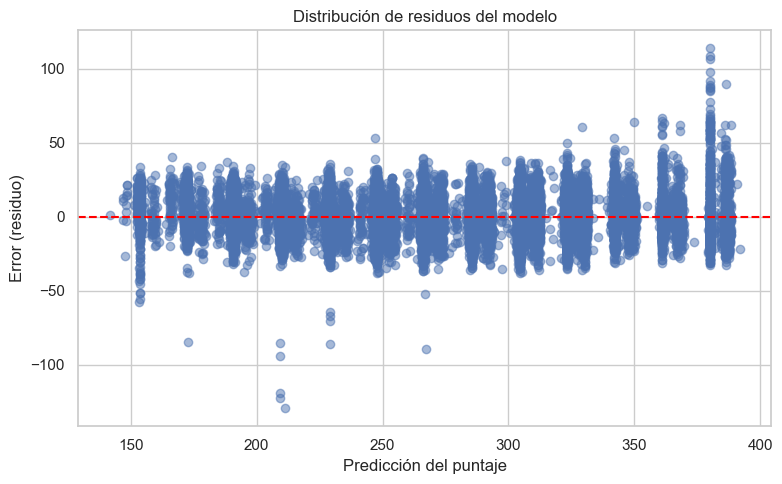

In [20]:
residuos = y_test - y_pred

plt.figure(figsize=(8, 5))
plt.scatter(y_pred, residuos, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title('Distribuci√≥n de residuos del modelo')
plt.xlabel('Predicci√≥n del puntaje')
plt.ylabel('Error (residuo)')
plt.tight_layout()
plt.show()


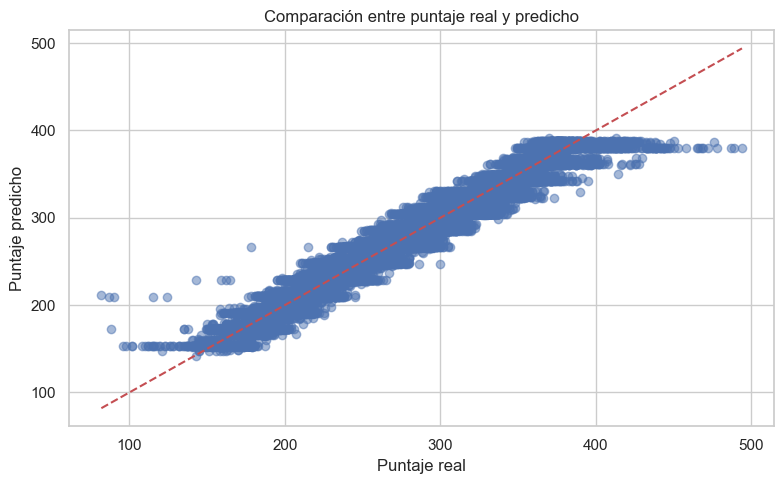

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Puntaje real')
plt.ylabel('Puntaje predicho')
plt.title('Comparaci√≥n entre puntaje real y predicho')
plt.tight_layout()
plt.show()


## Fase 4

Deber√°s elegir y realizar una de las dos alternativas que se encuentran a continuaci√≥n.

### Alternativa 1: desarrollar una herramienta interactiva de an√°lisis

En esta fase desarrollar√°s, a partir de alguno de los an√°lisis realizados, una herramienta interactiva que sea relevante en el contexto del problema, acompa√±ada de las instrucciones necesarias para que un usuario la pueda utilizar.

Pautas generales:

* Seleccionar uno de los an√°lisis previos que pueda verse enriquecido con alguna caracter√≠stica de interactividad.
* Seleccionar el/los par√°metro(s) que el usuario podr√° cambiar.
* Desarrollar las funciones que se deben ejecutar con cada acci√≥n del usuario.
* Utilizar una librer√≠a especializada (ej., `ipywidgets`, `panel`, etc.) para implementar la herramienta.

Preguntas gu√≠a:

* ¬øCu√°l o cu√°les preguntas podr√° hacerle el usuario a la herramienta y c√≥mo aporta la respuesta al an√°lisis?
* ¬øQu√© aprendizajes clave puede explorar u obtener el usuario con esta herramienta?

In [ ]:
# Implementa tu respuesta en esta celda}


### Alternativa 2: registrar en bases de datos relacionales con PySpark

En esta fase desarrollar√°s, a partir de alguno de los an√°lisis realizados, un _script_ que sea relevante en el contexto del problema, acompa√±ado de las instrucciones necesarias para que un usuario lo pueda ejecutar.

Pautas generales:

* Cargar en una base de datos relacional (tipo SQL) el segmento de los datos sobre el cual profundizaste en tu an√°lis, utilizando una tabla distinta para cada categor√≠a de campos. Por ejemplo, una categor√≠a puedes ser informaci√≥n del colegio; en cuyo caso, una tabla deber√≠a contener un registro √∫nico para cada colegio y todos los campos asociados.

* Los campos, a excepci√≥n de los identificadores, deben existir en un √∫nica tabla.

* Cada registro debe existir una √∫nica vez en su respectiva tabla.

* Cada registro debe tener un identificador √∫nico en su tabla, el cual establece una relaci√≥n entre tablas.

* Seleccionar uno de los modelos predictivos implementados.

* Crear en la base de datos relacional una tabla que contenga √∫nicamente los identificadores del registro y la predicci√≥n de la variable de respuesta hecha por el modelo.

* Desarrollar _queries_ de SQL seg√∫n las siguientes indicaciones y concluir acerca de los resultados:
    * Un _query_ que seleccione todos registros y los agregue en una √∫nica tabla. Para esto debes relacionar las tablas por su identificador, utilizando el m√©todo `JOIN`.
    * Un _query_ que contenga el puntaje promedio de los estudiantes, agrupado por a√±o y por colegio.
    * Distintos _queries_ que calculen medidas de error de predicci√≥n del modelo a partir de los datos reales y las predicciones respectivas. Debes reportar el error para cada registro, el error total de los registros de entrenamiento y el error total de los registros de prueba.
    * Haz dos _queries_ adicionales que resulten interesantes.

Preguntas gu√≠a:

* ¬øC√≥mo aporta la segmentaci√≥n de los datos en categor√≠as de campos al manejo de los datos?
* ¬øQu√© filtros y agrupaciones podemos aplicar sobre los datos con el fin de obtener informaci√≥n relevante?

In [ ]:
# Implementa tu respuesta en esta celda


## Referencias

*  J. VanderPlas (2016) *Python Data Science Handbook: Essential Tools for Working with Data* O'Reilly Media, Inc.
*  scikit-learn developers . (2020). Demo of DBSCAN clustering algorithm. 11 Diciembre 2020, de scikit-learn <br> https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html#sphx-glr-auto-examples-cluster-plot-dbscan-py

## Cr√©ditos

__Autores__: Camilo Hernando G√≥mez Castro, Alejandro Mantilla Redondo, Jose Fernando Barrera de Plaza, Diego Alejandro Cely G√≥mez.

__Fecha √∫ltima actualizaci√≥n__: 29/09/2022